## Evaluate Performance for 1D bosonic RNN with and without $S_z^{tot}=0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as colors
import matplotlib.cm as cmx
params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 14,
    "figure.figsize": (6, 4),
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "lines.linewidth": 2,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 5,
    "lines.marker": "o",
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")

print(os.environ["PATH"])
os.environ["PATH"] += os.pathsep + '/opt/local/bin'
print(os.getenv("PATH"))

cm = plt.get_cmap('tab10') 
values = range(8)
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
sm = cmx.ScalarMappable(norm=cNorm, cmap=cm)


def load(fol, folders):
    # load target observables
    target_obs = {}
    for obs in ["sxsx", "sysy", "szsz"]:
        target_obs[obs] = []
        for folder in folders:
            value = np.real(np.load(fol+folder+"target_"+obs+".npy",allow_pickle=True))
            target_obs[obs].append(value)


    # load observables from RNN reconstruction
    rnn_obs = {}
    for obs in ["sxsx", "sysy", "szsz"]:
        rnn_obs[obs] = []
        for folder in folders:
            values = np.array(np.load(fol+folder+obs+".npy",allow_pickle=True))
            new_values = np.zeros((len(values[0][0]), len(values[0])))
            for v1 in range(len(values[0])):
                for v2 in range(len(values[0][v1])):
                    new_values[v2,v1] = values[0][v1][v2]
            rnn_obs[obs].append(new_values)
    return target_obs, rnn_obs

def plot(folders, rnn_obs, target_obs):
    # plot
    fig, ax = plt.subplots(1,3, figsize=(13,4), sharey=True, sharex=True)
    for o, obs in enumerate(["sxsx", "sysy", "szsz"]):
        for f, folder in enumerate(folders):
            for r, row in enumerate(target_obs[obs][f][0]):
                ax[o].plot(row, color = sm.to_rgba(f))
                ax[o].plot(rnn_obs[obs][f][r] , color = sm.to_rgba(f), linestyle="dotted", marker="x", markersize=10)
            ax[o].plot([],[], color = sm.to_rgba(f), label = folder)
        ax[o].legend(title=obs, title_fontsize=16, loc="upper right")
    plt.show()

/Users/hannah.lange/opt/anaconda3/bin:/Users/hannah.lange/opt/anaconda3/condabin:/opt/local/bin:/opt/local/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/munki
/Users/hannah.lange/opt/anaconda3/bin:/Users/hannah.lange/opt/anaconda3/condabin:/opt/local/bin:/opt/local/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/munki:/opt/local/bin


## 4x4 qubits, square lattice

In [2]:
f = "4x4_qubits/"
folders = ["J=1.0t=0.0den=1.0/"]
target, rnn = load(f,folders)

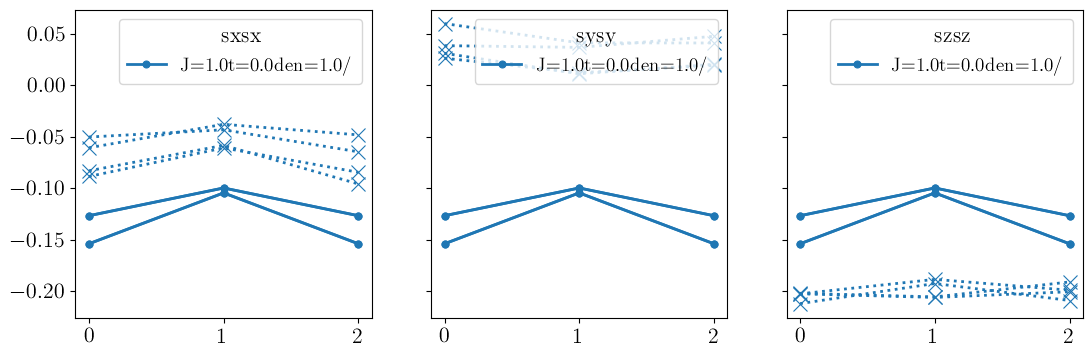

In [3]:
plot(folders, rnn, target)

In [4]:
for folder in folders:
    print(folder)
    eloc = np.load(f+folder+"/Eloc.npy")
    print("RNN energy: "+str(eloc))
    e = np.load(f+folder+"/E.npy")
    print("DMRG energy: "+str(e))
    print("relative error: "+str(np.abs(eloc-e)/np.abs(e)))

J=1.0t=0.0den=1.0/
RNN energy: (-14.099822-0.028785653j)
DMRG energy: (-15.189207065192969+4.476331194505709e-17j)
relative error: 0.07174602745534085


## 4x4 qubits, triangular lattice

In [31]:
f = "4x4_qubits/"
folders = ["J=1.0t=0.0den=1.0/", "J=1.0t=0.0den=0.75/"]
target, rnn = load(f,folders)

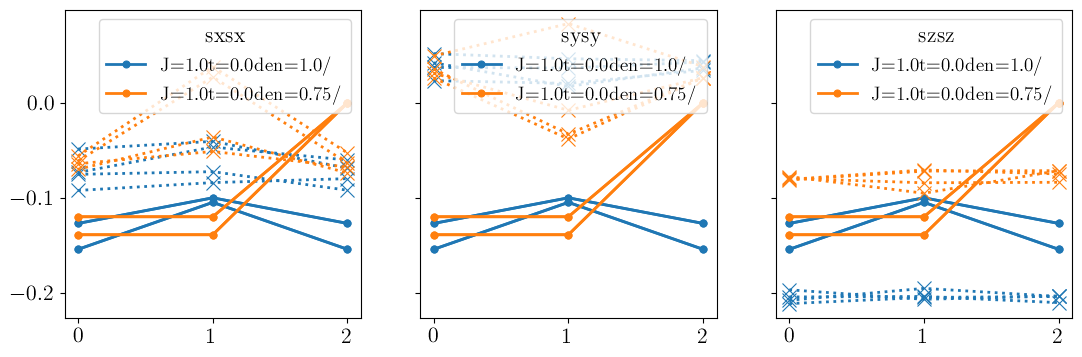

In [32]:
plot(folders, rnn, target)

In [33]:
for folder in folders:
    print(folder)
    eloc = np.load(f+folder+"/Eloc.npy")
    print("RNN energy: "+str(eloc))
    e = np.load(f+folder+"/E.npy")
    print("DMRG energy: "+str(e))
    print("relative error: "+str(np.abs(eloc-e)/np.abs(e)))

J=1.0t=0.0den=1.0/
RNN energy: (-14.1173935+0.13879652j)
DMRG energy: (-15.189207065192969+4.476331194505709e-17j)
relative error: 0.07115335661453183
J=1.0t=0.0den=0.75/
RNN energy: (-7.749704-0.04459343j)
DMRG energy: (-10.941933806445663+4.566952510213454e-16j)
relative error: 0.2917712202066631
